In [1]:
import sys
import pandas as pd

In [2]:
import os
dataset_path = "dataset"
csv = os.listdir(dataset_path)
csv = [f for f in csv if os.path.isfile(dataset_path + '/' + f) and ".csv" in f]
csv[:5]

['AAL_data.csv',
 'AAPL_data.csv',
 'AAP_data.csv',
 'ABBV_data.csv',
 'ABC_data.csv']

In [3]:
class StockData:
    def __init__(self,stock, path, dataset_path):
        self.csv_path = path
        self.stock =  stock
        self.dataset_path = dataset_path
    def load_df(self):
        df = pd.read_csv(dataset_path + "/" + self.csv_path)
        return df

In [4]:
StockDataList = []
for path in csv:
    stock = path.split("_")[0]
    StockDataList.append(StockData(stock,path,dataset_path))
print(StockDataList[0].stock, StockDataList[0].csv_path)

AAL AAL_data.csv


In [5]:
list_of_df = []
for Stockdata in StockDataList:
    list_of_df.append(Stockdata.load_df())

In [6]:
df = pd.concat(list_of_df)

# Occurence

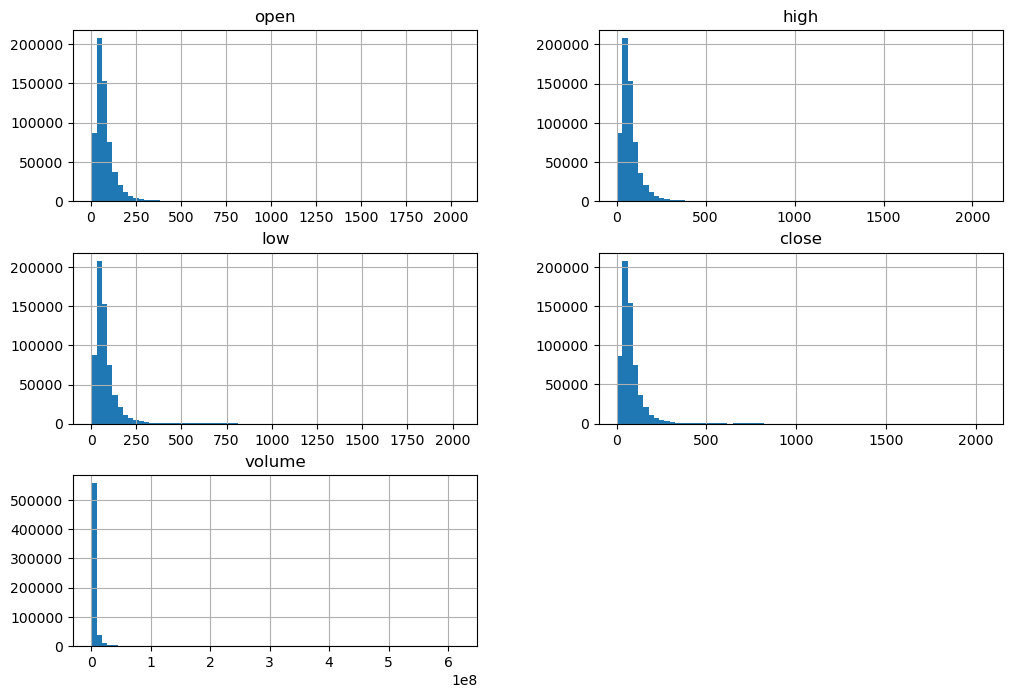

In [7]:
hist = df.hist(bins=70,figsize=(12,8)) 

In [8]:
df.low.mean()

82.25609641375566

In [9]:
df.high.mean()

83.77831069346986

In [12]:
print("The average of low vs average of high is ", df.high.mean() - df.low.mean())

The average of low vs average of high is  1.5222142797142055


This low of a number is a bit intresting since it shows how little change there is a day to day bases for stocks avergly

# Comparing Opening to closing price

In [13]:
df.open.mean()

83.02333431454747

In [14]:
df.close.mean()

83.04376276476482

This is expected that the closing price is higher as the stock prices on average grow over time

# Adding four columns for Exploratory reasons

In [36]:
df["Max_Margin"] =  df["high"] - df["low"]
df["Day_Margin"] = df["close"]  - df["open"]
df

,date,open,high,low,close,volume,Name,Max_Margin,Day_Margin,ROI_Max,Day_ROI
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,0.49,-0.32,1.033493,1.021695
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,0.75,-0.43,1.052595,1.029737
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,0.41,-0.18,1.029078,1.012614
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.69,0.36,1.048421,0.975443
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,1.80,-0.95,1.136778,1.067906
...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,1.58,0.98,1.020602,0.987407
1255,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,1.39,-0.75,1.018115,1.009768
1256,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,3.74,-2.81,1.051107,1.038060
1257,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2.43,0.53,1.033689,0.992766


In [49]:
df["ROI_Max"] =  (df["high"] / df["low"] - 1)
df["Day_ROI"] = (df["close"] / df["open"] - 1)

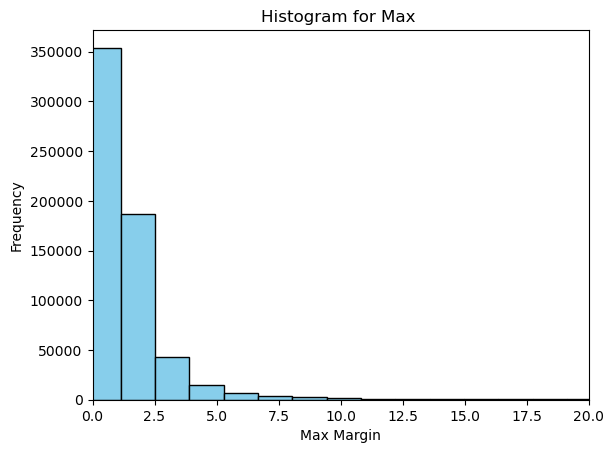

In [76]:
import matplotlib.pyplot as plt

plt.xlabel('Max Margin')
plt.ylabel('Frequency')
plt.title('Histogram for Max ')
plt.xlim(0, 20)

plt.hist(df["Max_Margin"], bins=100, color='skyblue', edgecolor='black')
plt.show()


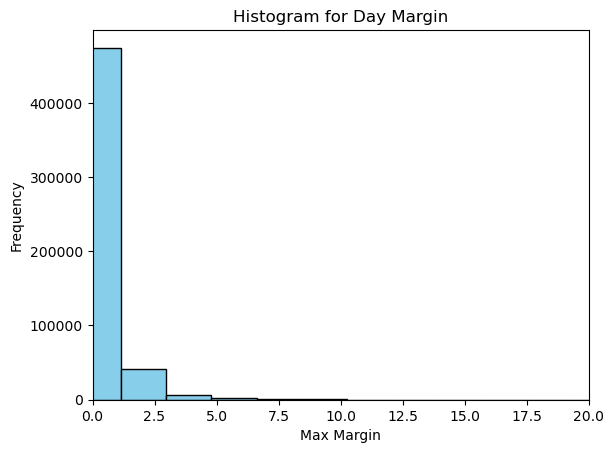

In [75]:
import matplotlib.pyplot as plt

plt.xlabel('Max Margin')
plt.ylabel('Frequency')
plt.title('Histogram for Day Margin')
plt.xlim(0, 20)

plt.hist(df["Day_Margin"], bins=100, color='skyblue', edgecolor='black')
plt.show()

In [51]:
print(df["Max_Margin"].mean())
print(df["Day_Margin"].mean())

1.522214279714134
0.019970664217669944


Max_margin would represent if you perfeclty timed the market vs buying at opening of a day and selling at closing. Though both methods on avg are still better than nothing is what this would mean

In [52]:
print("Max price is ", df["Max_Margin"].max())
print("Min price is ", df["Max_Margin"].min())

Max price is  138.26
Min price is  -0.25500000000000256


There is a issue with the data here it shouldn't be possible for Max_Margin to be below 0 since it's calculated by subtracting low from high.

In [53]:
print("Max price is ", df["Day_Margin"].max())
print("Min price is ", df["Day_Margin"].min())

Max price is  81.37999999999988
Min price is  -100.98000000000002


# Looking into possible ROI 

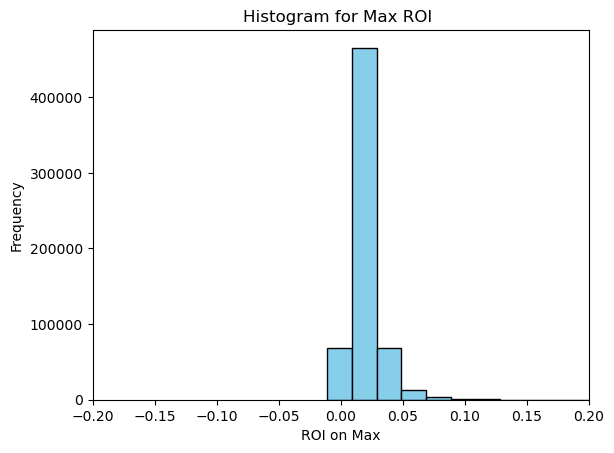

In [82]:
import matplotlib.pyplot as plt

plt.xlabel('ROI on Max')
plt.ylabel('Frequency')
plt.title('Histogram for Max ROI ')
plt.xlim(-.2, .2)

plt.hist(df["ROI_Max"], bins=300, color='skyblue', edgecolor='black')
plt.show()


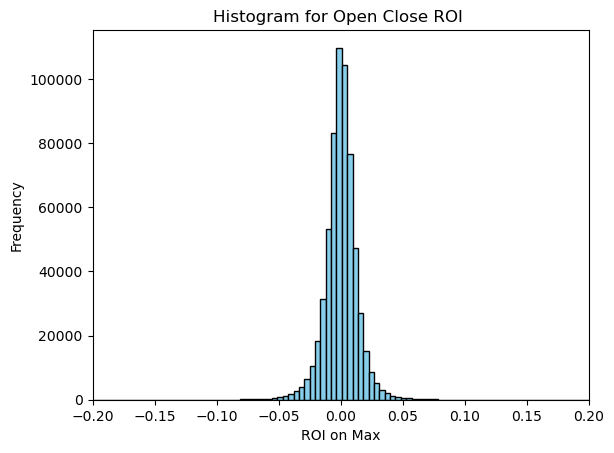

In [83]:
import matplotlib.pyplot as plt

plt.xlabel('ROI on Max')
plt.ylabel('Frequency')
plt.title('Histogram for Open Close ROI ')
plt.xlim(-.2, .2)

plt.hist(df["Day_ROI"], bins=300, color='skyblue', edgecolor='black')
plt.show()

# Correlation

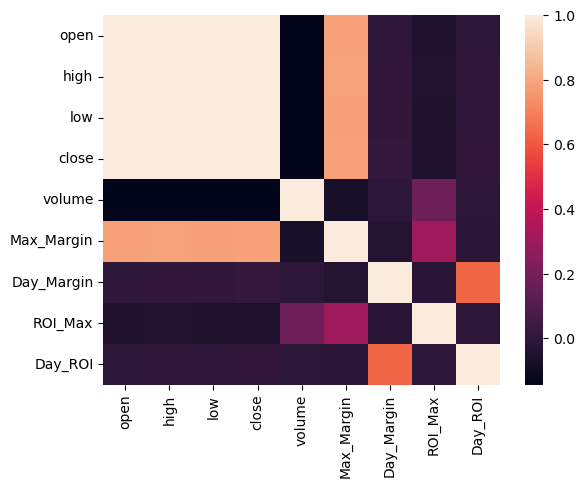

In [93]:
import seaborn as sns
sns.heatmap(df[["open","high","low","close","volume","Max_Margin","Day_Margin","ROI_Max","Day_ROI"]].corr());

The Fields that would be intresting to predict are Day_Margin, Day_ROI, Close, Low, High. Something intresting is Volume being a predicator for ROI. But most these fields have very low correlation for the ones we would know at infrence time. This would lead to the assumation that doing classifaction may not be possible though viewing as time series regression may be the best approach. 